# Algorithm to detect inverted images and rotating them 180 degrees
## Import necessary libraries

In [ ]:
import os
import cv2
import glob
import numpy
import imagehash
from PIL import Image
import matplotlib.pyplot as plt

## Path of the main folder 
- images: list of all .jpg images
- ref_img: referece image 

In [ ]:
# path = os.path.join('cast_tasks/task-3/')

In [ ]:
images = glob.glob('*.jpg')
ref_img = glob.glob('ref/image.jpg')

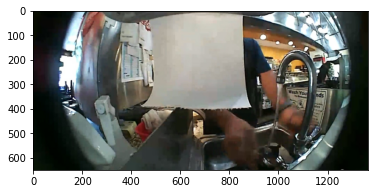

In [17]:
ref = cv2.imread(ref_img[0])
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
plt.imshow(ref)

## Check image is inverted or not and saving rotated image

In [19]:
threshold = 25
count_p = 0
count_n = 0
i = 0
for img in images:

    # calculate average hashing of input and referece image
    hash0 = imagehash.average_hash(Image.open(img)) 
    hash1 = imagehash.average_hash(Image.open(ref_img[0])) 

    # calculating the difference between the hashed images
    diff = hash0 - hash1
    
    # input image and referece image are almost similar
    if diff < threshold:
    
        print('image is not inverted')
        count_n += 1
    
    # input image and referece image are completely different (inverted)
    else:
    
        print('image is inverted')
        count_p += 1

        image = cv2.imread(img)
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(path + 'out/' + 'img_' + str(i) + '.jpg', image)
        
    i += 1

total = count_p + count_n
metric = (count_p / total)
print('Metric:', metric)


image is inverted
image is inverted
image is inverted
image is inverted
Metric: 1.0


## Checking results

In [20]:
images_inv = glob.glob('out/*.jpg')

In [23]:
img = cv2.imread(images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_inv = cv2.imread(images_inv[1])
img_inv = cv2.cvtColor(img_inv, cv2.COLOR_BGR2RGB)

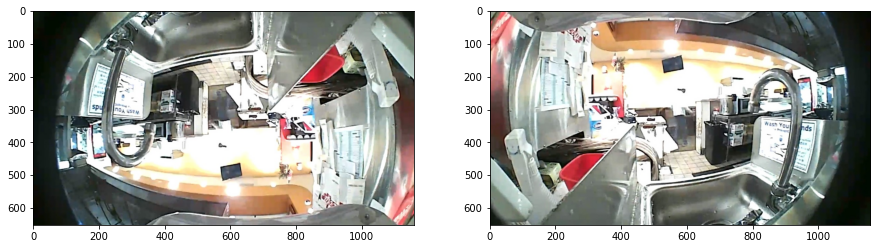

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_inv)